## 0 - Data ingestion and prep

In [116]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()
recession_df = pd.read_csv('data/cleaned data/total_market_data_merged.csv')

In [117]:
recession_df=recession_df.drop('Unnamed: 0', axis = 1)
recession_df.head()

,Five-Digit ZIP Code,year,Annual Change (%),HPI,HPI from 2012,HPI with 2012 base,normalized_sale_price,RECESSION_FLAG,avg_rate_for_year,Median_hh_income,Year_Avg_Unempl,state,zip_code,bucketed_year,State_Num,Resident Population,Percent Change in Resident Population
0,1001.0,1984,.,100.00,279.95,0.357207,58369.688570,0,10.225000,55828,7.7,Massachusetts,1001,1990,6.0,6016425.0,4.9
1,1001.0,1985,16.00,116.00,279.95,0.414360,67708.838742,0,8.100833,56871,7.2,Massachusetts,1001,1990,6.0,6016425.0,4.9
2,1001.0,1986,14.21,132.48,279.95,0.473227,77328.163418,0,6.805000,58920,6.7,Massachusetts,1001,1990,6.0,6016425.0,4.9
3,1001.0,1987,21.08,160.41,279.95,0.572995,93630.817436,0,6.657500,59624,6.2,Massachusetts,1001,1990,6.0,6016425.0,4.9
4,1001.0,1988,17.63,188.68,279.95,0.673977,110131.928394,0,7.568333,60115,5.5,Massachusetts,1001,1990,6.0,6016425.0,4.9


In [118]:
recession_df = recession_df[recession_df["Annual Change (%)"].notna()]
recession_df=recession_df[~recession_df.isin(["."]).any(axis=1)]
recession_df["Annual Change (%)"] = recession_df["Annual Change (%)"].astype(float)

In [119]:
recession_df.dtypes

Five-Digit ZIP Code                      float64
year                                       int64
Annual Change (%)                        float64
HPI                                      float64
HPI from 2012                            float64
HPI with 2012 base                       float64
normalized_sale_price                    float64
RECESSION_FLAG                             int64
avg_rate_for_year                        float64
Median_hh_income                           int64
Year_Avg_Unempl                          float64
state                                     object
zip_code                                   int64
bucketed_year                              int64
State_Num                                float64
Resident Population                      float64
Percent Change in Resident Population    float64
dtype: object

In [120]:
import seaborn as sns

## 1 - Recession (shrinking economy) in the year

In [121]:
recession_hpi_increase = recession_df.loc[recession_df['RECESSION_FLAG'] == 1, 'Annual Change (%)'].mean()
recession_hpi_increase

1.116236732068197

In [122]:
recession_df_one = recession_df[recession_df['RECESSION_FLAG']==1]
recession_hpi_by_zip = recession_df_one.groupby('zip_code')['Annual Change (%)'].mean().reset_index()
recession_hpi_by_zip.dtypes

zip_code               int64
Annual Change (%)    float64
dtype: object

In [123]:
recession_hpi_by_zip.head()

,zip_code,Annual Change (%)
0,1001,0.04500
1,1002,-0.08375
2,1005,-0.14400
3,1007,0.15000
4,1008,-1.17500


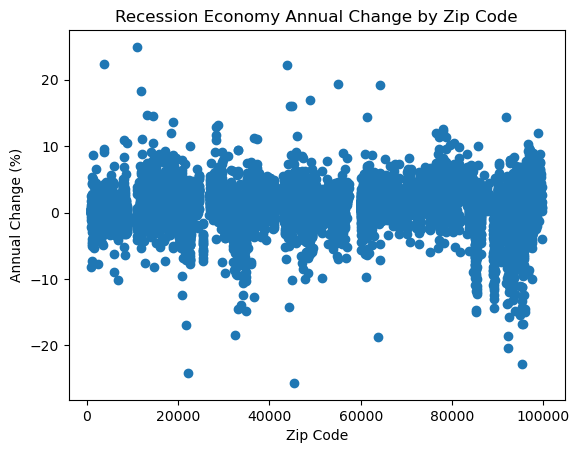

In [147]:
# create a scatter plot
plt.scatter(x='zip_code', y='Annual Change (%)', data=recession_hpi_by_zip)

# labels
plt.xlabel('Zip Code')
plt.ylabel('Annual Change (%)')
plt.title('Recession Economy Annual Change by Zip Code')
plt.savefig("Visuals/recession_change_zip.png")
plt.show()

## 2 - No Recession (growing economy) in the year

In [125]:
bull_hpi_increase = recession_df.loc[recession_df['RECESSION_FLAG'] == 0, 'Annual Change (%)'].mean()
bull_hpi_increase

5.0258171408849375

In [126]:
recession_df_zero = recession_df[recession_df['RECESSION_FLAG']==0]
no_recession_hpi_by_zip = recession_df_zero.groupby('zip_code')['Annual Change (%)'].mean().reset_index()
no_recession_hpi_by_zip.dtypes


zip_code               int64
Annual Change (%)    float64
dtype: object

In [127]:
no_recession_hpi_by_zip.head()

,zip_code,Annual Change (%)
0,1001,5.109000
1,1002,5.783871
2,1005,4.446400
3,1007,5.092414
4,1008,3.724667


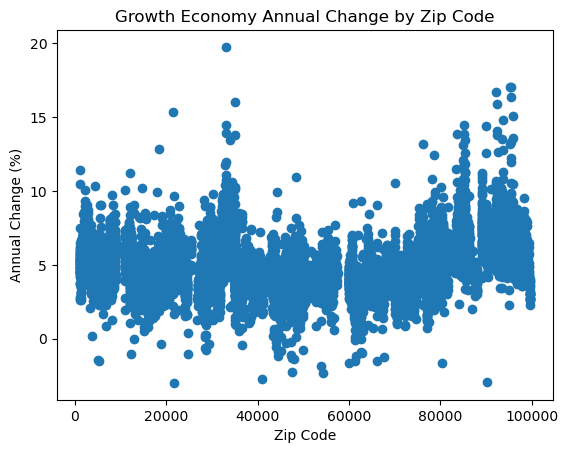

In [148]:
# create a scatter plot
plt.scatter(x='zip_code', y='Annual Change (%)', data=no_recession_hpi_by_zip)

# labels
plt.xlabel('Zip Code')
plt.ylabel('Annual Change (%)')
plt.title('Growth Economy Annual Change by Zip Code')
plt.savefig('Visuals/norecession_change_zip.png')
plt.show()

## 3 - Outliers Investigation

In [129]:
#RECESSION OUTLIERS
Q1 = recession_hpi_by_zip['Annual Change (%)'].quantile(0.25)
Q3 = recession_hpi_by_zip['Annual Change (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# save out the outliers
recession_upper_outliers = recession_hpi_by_zip[(recession_hpi_by_zip['Annual Change (%)'] > upper_bound)]
recession_lower_outliers = recession_hpi_by_zip[(recession_hpi_by_zip['Annual Change (%)'] < lower_bound)]

In [130]:
print(IQR)

3.0900000000000003


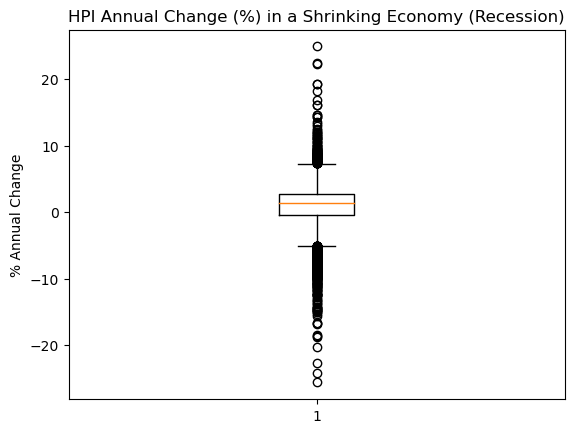

In [149]:
recession = recession_hpi_by_zip['Annual Change (%)']
plt.boxplot(recession)
plt.ylabel("% Annual Change")
plt.title("HPI Annual Change (%) in a Shrinking Economy (Recession)")
plt.savefig('Visuals/recession_HPI_change.png')
plt.show()


The boxplot of % annual change in recession versus no recession years look very different. In a recession, we see many more zipcodes with reductions in HPI. There are many outliers on both the positive and negative change ends, and there are so many outliers compared to the actual box plot. 

In [132]:
#set east and west coast data 
ec = recession_hpi_by_zip[recession_hpi_by_zip["zip_code"]<30000]
wc = recession_hpi_by_zip[recession_hpi_by_zip["zip_code"]>=90000]
ec_nr = no_recession_hpi_by_zip[no_recession_hpi_by_zip["zip_code"]<30000]
wc_nr = no_recession_hpi_by_zip[no_recession_hpi_by_zip["zip_code"]>=90000]

In [139]:
##create bins to make a bar chart displaying distribution of %annual change
bins = np.arange(0, 18, 1)
labels = ['1%', '2%', '3%', '4%', '5%', '6%', '7%', '8%', '9%', '10%', '11%', '12%', '13%', '14%', '15%', '16%', '17%']
wc_nr["Annual change groups"] = pd.cut(wc_nr["Annual Change (%)"], bins, labels=labels)
#example display west coast with no recession
wc_nr


/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_53350/3348307031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_nr["Annual change groups"] = pd.cut(wc_nr["Annual Change (%)"], bins, labels=labels)


,zip_code,Annual Change (%),Annual change groups
11109,90001,8.519355,9%
11110,90002,8.645806,9%
11111,90003,8.688710,9%
11112,90004,7.010323,8%
11113,90005,7.720741,8%
...,...,...,...
12978,99654,2.263000,3%
12979,99701,4.034000,5%
12980,99705,2.695667,3%
12981,99709,2.642000,3%


In [140]:
#display data to be displayed in histogram
wc_nr.groupby("Annual change groups").count()["Annual Change (%)"]


Annual change groups
1%       0
2%       0
3%       9
4%      23
5%     118
6%     443
7%     665
8%     410
9%     140
10%     30
11%     15
12%      2
13%      4
14%      5
15%      3
16%      2
17%      2
Name: Annual Change (%), dtype: int64

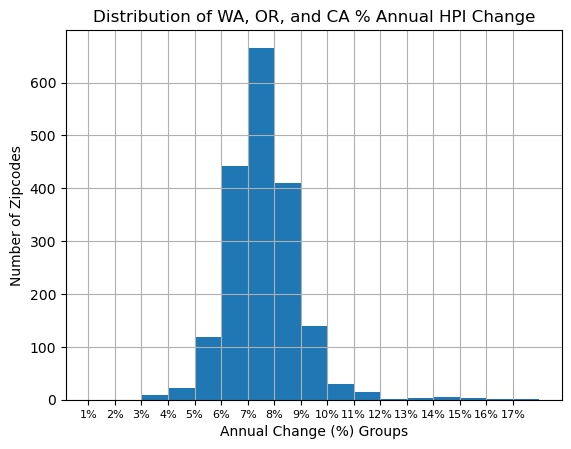

<Figure size 640x480 with 0 Axes>

In [144]:
#west coast no recession bar chart 
wc_nr.hist(column = 'Annual Change (%)', bins = bins)
plt.xlabel("Annual Change (%) Groups")
plt.ylabel("Number of Zipcodes")
plt.title("Distribution of WA, OR, and CA % Annual HPI Change")
plt.xticks(ticks=np.arange(0,17,1), labels =labels, fontsize=8)
plt.show()
plt.savefig("Visuals/westHPIdist_no_rec.png")

/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_53350/2526529853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_nr["Annual change groups"] = pd.cut(ec_nr["Annual Change (%)"], bins, labels=labels)


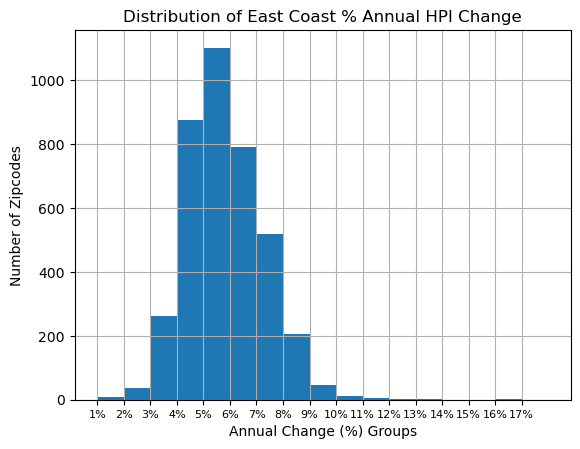

<Figure size 640x480 with 0 Axes>

In [145]:
#east coast no recession 
ec_nr["Annual change groups"] = pd.cut(ec_nr["Annual Change (%)"], bins, labels=labels)
ec_nr.hist(column = 'Annual Change (%)', bins = bins)
plt.xlabel("Annual Change (%) Groups")
plt.ylabel("Number of Zipcodes")
plt.title("Distribution of East Coast % Annual HPI Change")
plt.xticks(ticks=np.arange(0,17,1), labels =labels, fontsize=8)
plt.show()
plt.savefig("Visuals/eastHPIdist_no_rec.png")
plt.show()

/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_53350/1822909269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc["Annual change groups"] = pd.cut(wc["Annual Change (%)"], bins, labels=labels)


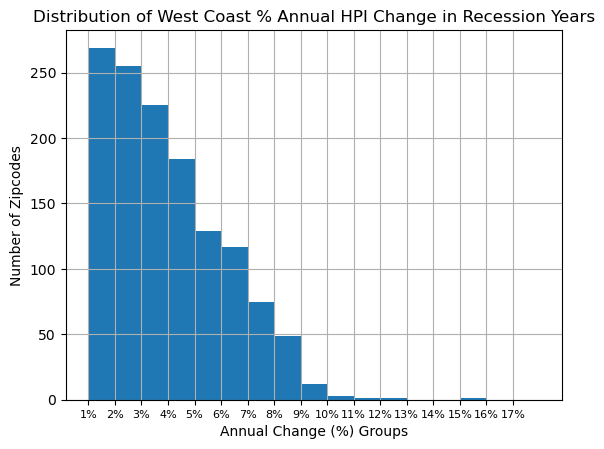

<Figure size 640x480 with 0 Axes>

In [146]:
#west coast in recession years 
wc["Annual change groups"] = pd.cut(wc["Annual Change (%)"], bins, labels=labels)
wc.hist(column = 'Annual Change (%)', bins = bins)
plt.xlabel("Annual Change (%) Groups")
plt.ylabel("Number of Zipcodes")
plt.title("Distribution of West Coast % Annual HPI Change in Recession Years")
plt.xticks(ticks=np.arange(0,17,1), labels =labels, fontsize=8)
plt.show()
plt.savefig("Visuals/westHPIdist_rec.png")
plt.show()

/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_53350/2072197374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec["Annual change groups"] = pd.cut(ec["Annual Change (%)"], bins, labels=labels)


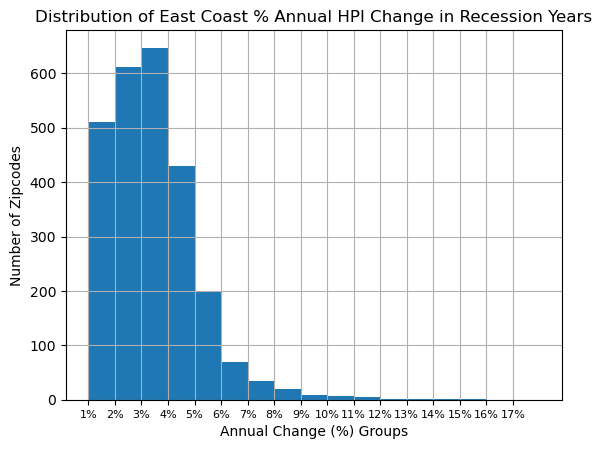

<Figure size 640x480 with 0 Axes>

In [95]:
#east coast in recession years 
ec["Annual change groups"] = pd.cut(ec["Annual Change (%)"], bins, labels=labels)
ec.hist(column = 'Annual Change (%)', bins = bins)
plt.xlabel("Annual Change (%) Groups")
plt.ylabel("Number of Zipcodes")
plt.title("Distribution of East Coast % Annual HPI Change in Recession Years")
plt.xticks(ticks=np.arange(0,17,1), labels =labels, fontsize=8)
plt.show()
plt.savefig("Visuals/eastHPIdist_rec.png")
plt.show()

In [17]:
# NO RECESSION OUTLIERS
Q1 = no_recession_hpi_by_zip['Annual Change (%)'].quantile(0.25)
Q3 = no_recession_hpi_by_zip['Annual Change (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# save out the outliers
no_recession_upper_outliers = no_recession_hpi_by_zip[(no_recession_hpi_by_zip['Annual Change (%)'] > upper_bound)]
no_recession_lower_outliers = no_recession_hpi_by_zip[(no_recession_hpi_by_zip['Annual Change (%)'] < lower_bound)]

In [18]:
print(IQR)

2.300240244954287


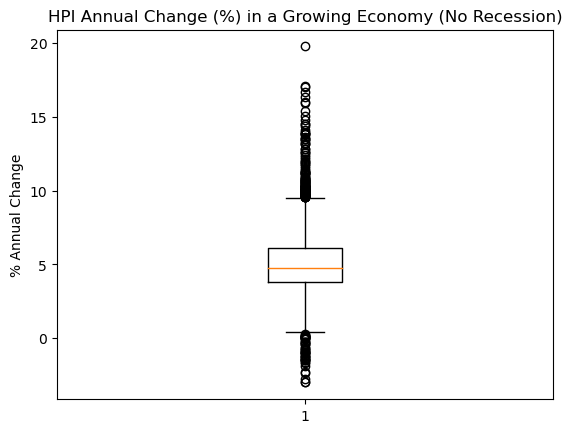

<Figure size 640x480 with 0 Axes>

In [38]:
no_recession = no_recession_hpi_by_zip['Annual Change (%)']
plt.boxplot(no_recession)
plt.ylabel("% Annual Change")
plt.title("HPI Annual Change (%) in a Growing Economy (No Recession)")
plt.show()
plt.savefig('Visuals/no_recession_HPI_change.png')

In years of no recession, or whenthe economy is growing, we see many more homes on the positive % change side of things. The negative changes are not as negative compared to recession years, and we see a noticable overall increase in HPI change in this boxplot. In years without a recession, HPI change goes up much more in most zip codes compared to a recession.

In [19]:
recession_upper_outliers.sort_values('Annual Change (%)', ascending=False)

,zip_code,Annual Change (%)
1260,10922,24.92000
670,3846,22.39000
5884,43840,22.27000
7657,55087,19.28000
8787,64167,19.26000
...,...,...
12685,98103,7.33750
12335,96744,7.33750
12628,97913,7.32800
12487,97333,7.32750


In [20]:
recession_lower_outliers.sort_values('Annual Change (%)', ascending=True)

,zip_code,Annual Change (%)
6327,45346,-25.6400
3100,22125,-24.1500
12112,95365,-22.7350
11466,92230,-20.3275
8696,63785,-18.7800
...,...,...
4225,32113,-5.0875
4641,33543,-5.0860
11847,94020,-5.0860
2878,20880,-5.0720


In [21]:
no_recession_upper_outliers.sort_values('Annual Change (%)', ascending=False)

,zip_code,Annual Change (%)
4511,33136,19.754000
12134,95365,17.060000
12127,95333,17.010909
11500,92268,16.690833
12180,95466,16.342500
...,...,...
10474,80623,9.580000
4900,34753,9.578824
11996,94612,9.554375
12102,95205,9.540000


In [22]:
no_recession_lower_outliers.sort_values('Annual Change (%)', ascending=True)

,zip_code,Annual Change (%)
3021,21665,-2.990000
11166,90212,-2.932000
5618,41002,-2.758000
7571,54232,-2.319091
6728,47456,-2.278182
7527,53937,-1.865000
8047,60029,-1.648889
10417,80428,-1.620000
738,5261,-1.490000
8904,66075,-1.483333


In [105]:
recession_lower_outliers.to_csv('data/cleaned data/recession_lower_outliers.csv')
recession_upper_outliers.to_csv('data/cleaned data/recession_upper_outliers.csv')
no_recession_lower_outliers.to_csv('data/cleaned data/no_recession_lower_outliers.csv')
no_recession_upper_outliers.to_csv('data/cleaned data/no_recession_upper_outliers.csv')